1. retrieve the data from this kaggle link
2. install texblob onto your conda environment
3. launch jupyter notebook in the same environment, and import pandas, matplotlib/seaborn and textblob
4. read the data into a dataframe with pandas

In [51]:
import nltk # underlying library NLP tools
from nltk.tokenize import word_tokenize # check nltk is downloaded
import pandas as pd # for data hadnling
import docx2txt # for pulling data from a word doc
from textblob import TextBlob # for sentiment analysis
import matplotlib.pyplot as plt # visualisation

In [52]:
clothingdf=pd.read_csv('Womens Clothing E-Commerce Reviews-2.csv')

In [53]:
clothingdf.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [54]:
clothingdf['Review Text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                             Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone w

In [55]:
pd.set_option('display.max_colwidth', None) #setting so we can 

## 5. Filter the data frame to a relevant subset of columns required for our data scenario (image clothing_columns.png) ('Title','Review Text', 'Rating', 'Division Name', 'Department Name')


In [179]:
clothingdf=clothingdf[['Title','Review Text', 'Rating', 'Division Name', 'Department Name']]

KeyError: "None of [Index(['Title', 'Review Text', 'Rating', 'Division Name', 'Department Name'], dtype='object')] are in the [columns]"

## 6. Use df.columns.str.lower() (or other preferred method) to standardise your column headers

In [59]:
clothingdf.columns=clothingdf.columns.str.lower()


## 7. EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)

In [61]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


Review_text: What the user thinks about the project
Rating. The score the user has attributed to the product. Very important to try to detect which words in the review are associated with good scores and which ones with bad.

In [62]:
clothingdf.shape

(23486, 5)

In [63]:
clothingdf.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### 8. Use the pandas groupby function to summarise the average rating by division and department as a new dataframe (image clothing_rating_groupby.png)

In [87]:
clothingdf_groupby=clothingdf.groupby(['division name', 'department name']).agg({'rating':'mean'})

In [89]:
clothingdf_groupby

rating
division name  department name          
General        Bottoms          4.268686
               Dresses          4.163003
               Jackets          4.240310
               Tops             4.148749
               Trend            3.822917
General Petite Bottoms          4.329356
               Dresses          4.133256
               Intimate         4.240343
               Jackets          4.304910
               Tops             4.216469
               Trend            3.782609
Initmates      Intimate         4.286285

### 9. This dataframe can be easily visualised as a bar chart - do so now (image clothing_rating_chart.png)

In [67]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Arrests'}, ylabel='rating'>

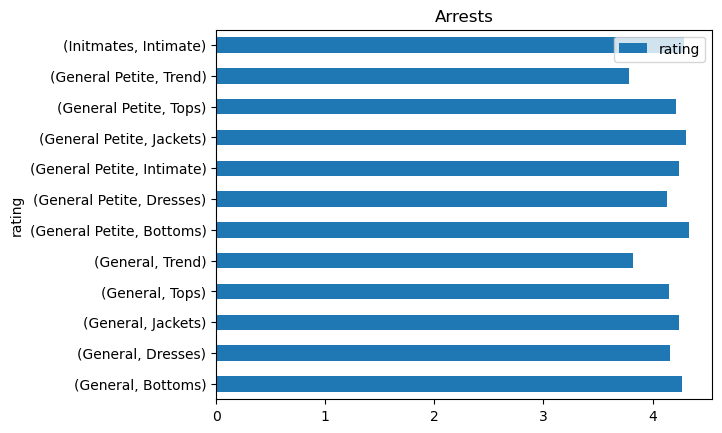

In [91]:
clothingdf_groupby.plot(kind='barh', title='Arrests', ylabel='department name',
         xlabel='rating')

### 11. Do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text (image clothing_sentiment_index5.png) Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself

In [105]:
TextBlob(clothingdf['review text'].iloc[5]).sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [106]:
TextBlob(clothingdf['review text'].iloc[6]).sentiment

Sentiment(polarity=0.13375, subjectivity=0.6077777777777778)

In [107]:
TextBlob(clothingdf['review text'].iloc[7]).sentiment

Sentiment(polarity=0.17163461538461539, subjectivity=0.49615384615384617)

In [108]:
TextBlob(clothingdf['review text'].iloc[8]).sentiment

Sentiment(polarity=0.0025000000000000022, subjectivity=0.38)

## 12. for the any selected customer review, use textblob to break out the text into sentences (image clothing_sentences.png)

In [114]:
TextBlob(clothingdf['review text'].iloc[8]).sentences

[Sentence("I love this dress."),
 Sentence("i usually get an xs but it runs a little snug in bust so i ordered up a size."),
 Sentence("very flattering and feminine with the usual retailer flair for style.")]

## 13. Using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)

In [161]:
clothingdf2= clothingdf.dropna(axis=0, subset=['review text'])

## 14. Define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)

In [164]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words=stopwords.words('english')

In [165]:
clothingdf2['sentiment_score']=clothingdf2['review text'].apply(lambda x:TextBlob(x).sentiment.polarity)

/var/folders/js/3prtlh997knckqf8p2nq_dz80000gn/T/ipykernel_9272/65569112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothingdf2['sentiment_score']=clothingdf2['review text'].apply(lambda x:TextBlob(x).sentiment.polarity)


In [166]:
clothingdf2

,title,review text,rating,division name,department name,sentiment_score
0,NaN,Absolutely wonderful - silky and sexy and comfortable,4,Initmates,Intimate,0.633333
1,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,General,Dresses,0.339583
2,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,General,Tops,0.512891
...,...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,General Petite,Dresses,0.552667
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",3,General Petite,Tops,0.091667
23483,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",3,General Petite,Dresses,0.414286
23484,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!",3,General,Dresses,0.322222


## 15. using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

In [167]:
clothingdf2=clothingdf2.groupby(['division name', 'department name']).agg({'sentiment_score':'min'})

In [168]:
clothingdf2

sentiment_score
division name  department name                 
General        Bottoms                -0.533333
               Dresses                -0.916667
               Jackets                -0.750000
               Tops                   -0.975000
               Trend                  -0.270833
General Petite Bottoms                -0.257778
               Dresses                -0.400000
               Intimate               -0.575000
               Jackets                -0.562500
               Tops                   -0.700000
               Trend                  -0.083333
Initmates      Intimate               -0.392333

## 16.visualise this summary as a simple sorted bar chart (image clothing_min_review_chart.png)

<AxesSubplot:title={'center':'Sentiment_score'}, ylabel='sentiment_score'>

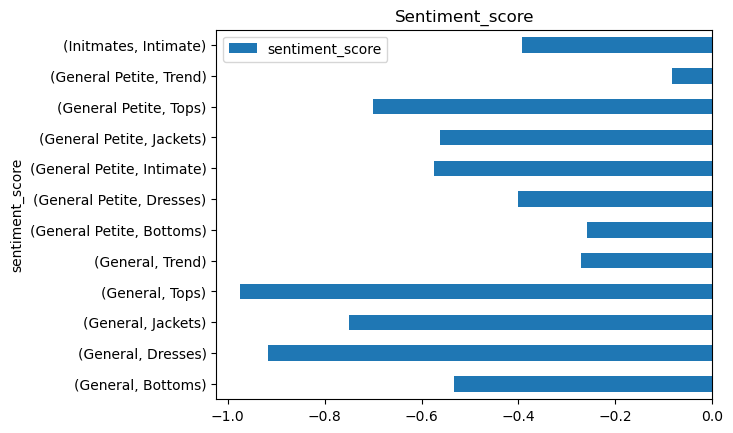

In [175]:
clothingdf2.plot(kind='barh', title='Sentiment_score', ylabel='department name',
         xlabel='sentiment_score')

## 17. using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe


In [177]:
clothingdf3=clothingdf2.groupby(['division name', 'department name']).agg({'sentiment_score':'mean'})

## 19. visualise this summary as a simple sorted bar chart

<AxesSubplot:title={'center':'Sentiment_score'}, ylabel='sentiment_score'>

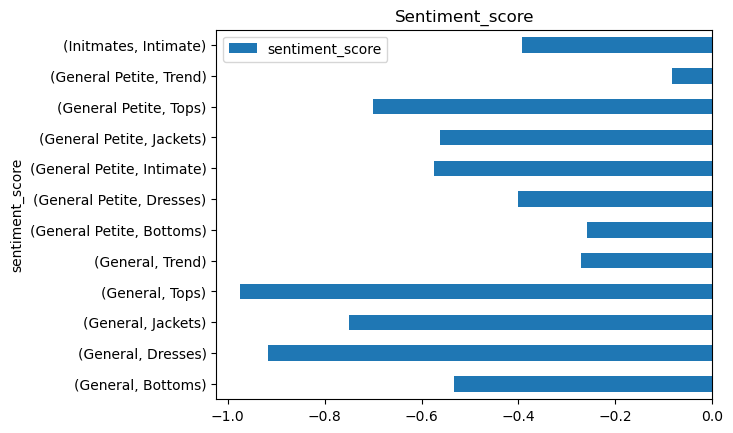

In [178]:
clothingdf2.plot(kind='barh', title='Sentiment_score', ylabel='department name',
         xlabel='sentiment_score')